# Titanic Competition

My Kaggle: https://www.kaggle.com/odednir

The goal of this notebook by using machine learning algorithms is to create a model that predicts which passengers survived the Titanic shipwreck.  

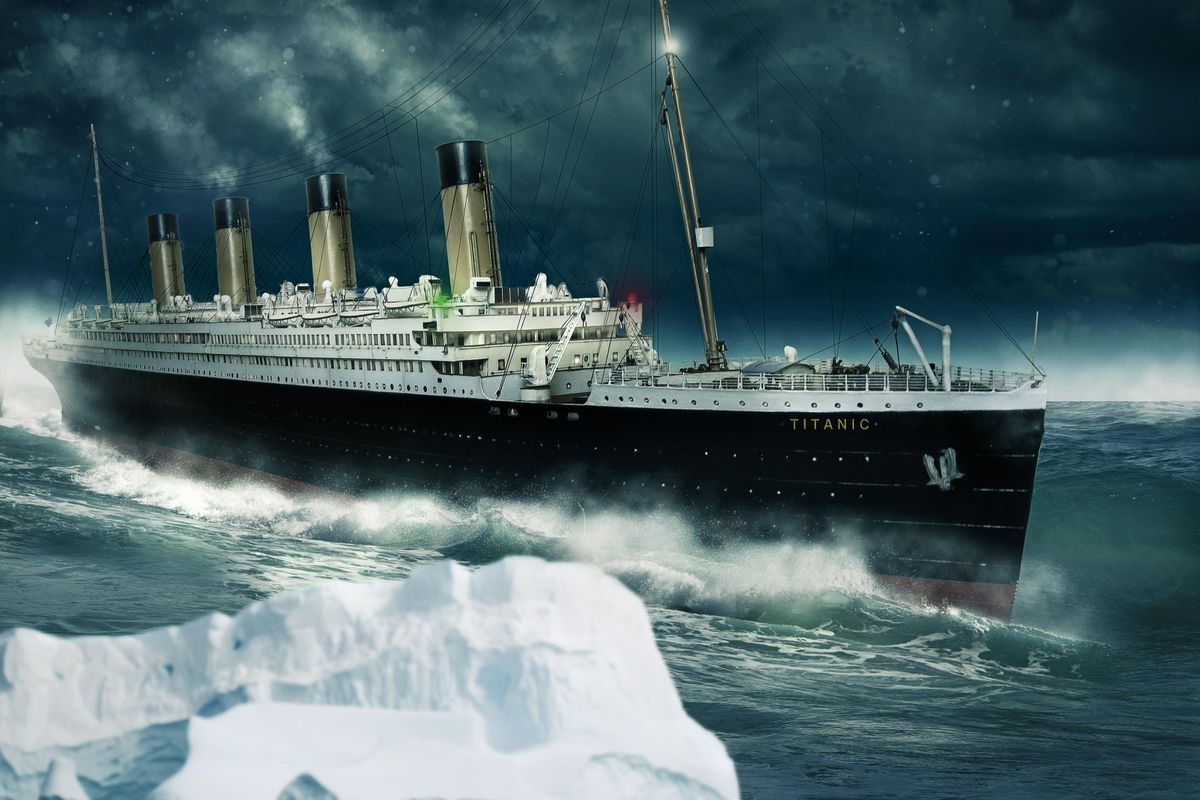

In this notebook I will try to predict survival of passengers by using LogisticRegression and SGDClassifier.
I will show graphs and connection between features to better understand the data and find ways to predict who will survive.

## Imports and Definitions

In [1]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

# define plt settings
sns.set()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

## Data Investigation and Preprocessing

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")

display(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Each row corresponds to a passanger that was on the Titanic.  
There were 891 passangers.

### The features:

- **Categorical**: Survived, Pclass, Sex, Embarked.   
- **Numerical**: Continous: Age, Fare. Discrete: SibSp, Parch.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Features Description

- `PassengerId`: in a range of 1 to 891. We will remove this feature later because of the lack of necessity, data frames already numbers the rows from 0 to 890.
- `Survived`: Can be 0 or 1. 0 for did not survive, 1 for survived.
- `Pclass`: Values are 1, 2 or 3. Represents the classes of tickets.
- `Name`: String object with full names of passangers.
- `Sex`: Male or female.
- `Age`: Passangers age.
- `SibSp`: Number of siblings or Spouse.
- `Parch`: Number of parents or children.
- `Ticket`: Ticket number with a value that may contain letters and numbers or only numbers.
- `Fare`: The price of the ticket
- `Cabin`: Cabin name. Most passangers apparently did not have a cabin.
- `Embarked`: A letter that represent the city that each passenger embarked from. C = Cherbourg, Q = Queenstown, S = Southampton.

### How many null values each feature has?

We can see that there are features that contain quite a few null values.  
We will need to handle it later by replacing those values with real ones.

- **Age** has **177** null values of type float64.  
- **Cabin** has **687** null values of type object.  
- **Embarked** has **2** null values of type object.  

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Features Distribution

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What can we understand from the distribution of the **numerical** features?

- Less than 40% have survived.
- Most were in their 30s.
- More than 75% did not travel with parents or children.
- 2228 were on the titanic but our train data has records of only 891 passengers (40%).
- Most of the passengers did not travel with siblings or spouse.
- Highest fare was 512 dollars, lowest 0 dollars.
- Most passengers ticket class was 3.

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Burns, Miss. Elizabeth Margaret",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


What can we understand from the distribution of the **catagorical** features?

- About 65% were Male.
- About 72% embarked from Southampton.
- Passengers probably shared cabins. 147 out of 204 were unique, so 57 shared their cabin.

### Removing features

`PassengerId` is not necessary for our prediction.  
`Cabin` has too many null values, and can not be used to give good results.  
`Ticket` does not have any connection to other features and we can not get from it any assumptions.  
`Name` do not give us any information for prediction.

In [7]:
train_df = train_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name'], axis=1)

display(train_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Connection between features

We will see how catagorical features correlate with survival.  

- Pclass <-> Survived
- Sex <-> Survived
- SibSp <-> Survived
- Parch <-> Survived
- Embarked <-> Survived

In [8]:
# Showing connection between 2 features using seaborn barplot
def plot_connection_between_2_features(df, feature_1_name, feature_2_name):
    sns.barplot(x=feature_1_name, y=feature_2_name, data=df)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


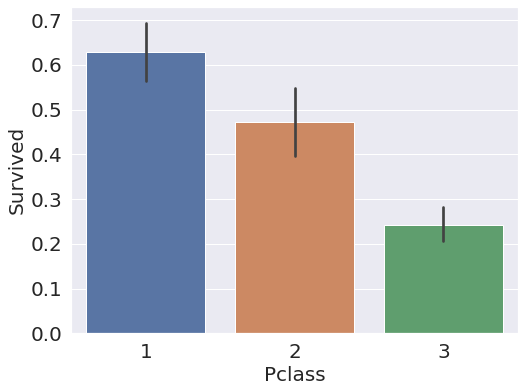

In [9]:
mean = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(mean)
plt.figure(figsize=(8,6))
plot_connection_between_2_features(train_df, 'Pclass', 'Survived')

,Sex,Survived
0,female,0.742038
1,male,0.188908


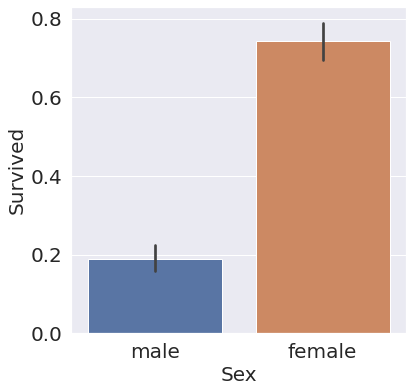

In [10]:
mean = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(mean)
plt.figure(figsize=(6,6))
plot_connection_between_2_features(train_df, 'Sex', 'Survived')

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


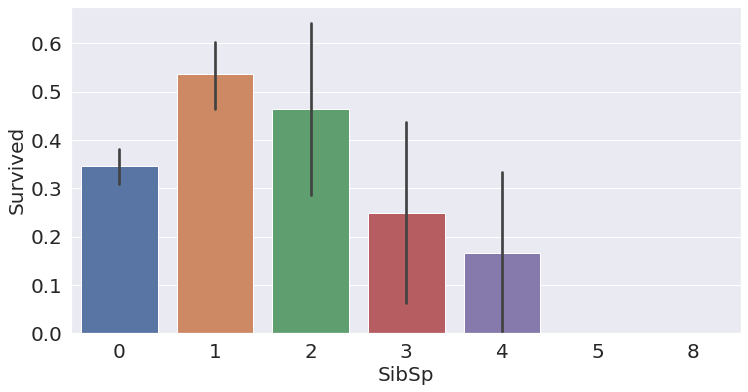

In [11]:
mean = train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(mean)
plt.figure(figsize=(12,6))
plot_connection_between_2_features(train_df, 'SibSp', 'Survived')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


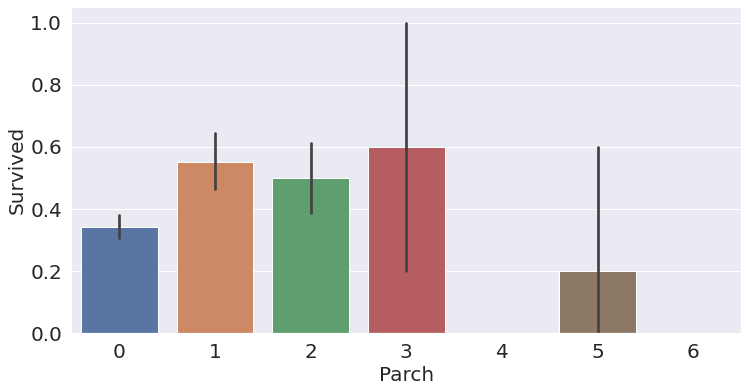

In [12]:
mean = train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(mean)
plt.figure(figsize=(12,6))
plot_connection_between_2_features(train_df, 'Parch', 'Survived')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


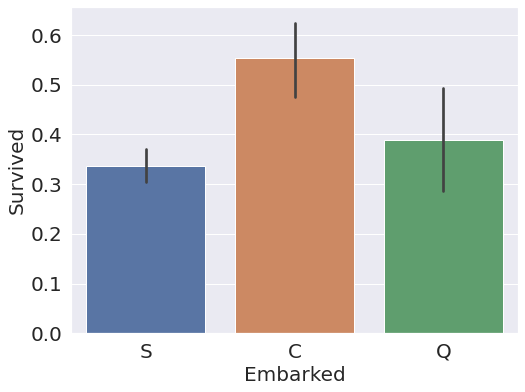

In [13]:
mean = train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display(mean)
plt.figure(figsize=(8,6))
plot_connection_between_2_features(train_df, 'Embarked', 'Survived')

**We can learn that:**

- Passengers with ticket class 1 were more likely to susrvive.
- Almost 75% were female.
- No significant correlation between number of family companions and survival rate.
- Most passengers who embarked from Cherbourg survived.

### Numerical Features Correlation
#### Age and survival
We will see that passengers in their 20s to 30s has more chances to die. However, infants are more likely to survive. Probably that is because children and women were taken on the life boats first.

We can now know that it is better to group ages together:
1. 0-18
2. 18-35
3. 35-55
4. Older than 55

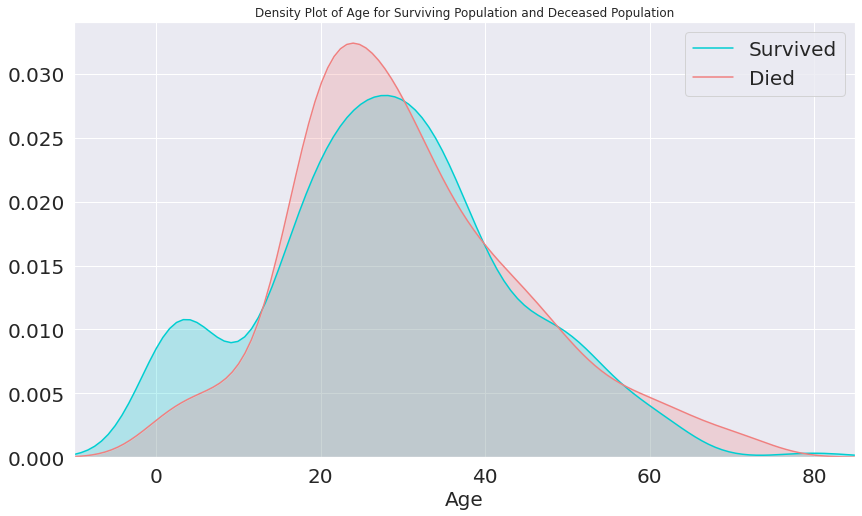

In [14]:
plt.figure(figsize=(14,8))
ax = sns.kdeplot(train_df["Age"][train_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Age"][train_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Fare and survival
It seems that passengers who paid less had more chances to die.  
So we will probably need to group fares.

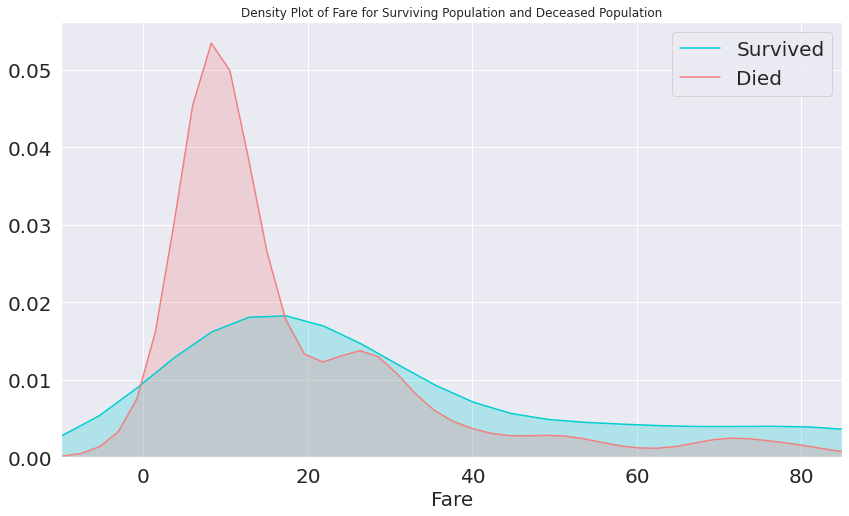

In [15]:
plt.figure(figsize=(14,8))
ax = sns.kdeplot(train_df["Fare"][train_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Fare"][train_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

### Adjusting features

- Age will be converted to Numeric value of 0 for male or 1 for female. 

In [16]:
def convertSex(df):
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

convertSex(train_df)
convertSex(test_df)

display(train_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


- Then we will fill up null values in 'Age' with the mean value 30:

In [17]:
train_df.fillna({'Age': 30}, inplace=True)
train_df['Age'] = train_df['Age'].astype(int)

test_df.fillna({'Age': 30}, inplace=True)
test_df['Age'] = test_df['Age'].astype(int)

### Creating features

- Find age ranges for catagorizing age to different age groups:

In [18]:
train_df['AgeRange'] = pd.cut(train_df['Age'], 5)
train_df[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


- Replacing age value to categories will help us deal with age float values:

In [19]:
def convertAgeToCat(df):
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age']

convertAgeToCat(train_df)
convertAgeToCat(test_df)
train_df = train_df.drop(['AgeRange'], axis=1)
display(train_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,7.2500,S
1,1,1,1,2,1,0,71.2833,C
2,1,3,1,1,0,0,7.9250,S
3,1,1,1,2,1,0,53.1000,S
4,0,3,0,2,0,0,8.0500,S


- Combining Parch and SibSp to family feature:

In [20]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

display(train_df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,0,1,1,0,7.2500,S,2
1,1,1,1,2,1,0,71.2833,C,2
2,1,3,1,1,0,0,7.9250,S,1
3,1,1,1,2,1,0,53.1000,S,2
4,0,3,0,2,0,0,8.0500,S,1


- Removing Parch and SibSp features:

In [21]:
train_df = train_df.drop(['SibSp', 'Parch'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch'], axis=1)

display(train_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,1,7.2500,S,2
1,1,1,1,2,71.2833,C,2
2,1,3,1,1,7.9250,S,1
3,1,1,1,2,53.1000,S,2
4,0,3,0,2,8.0500,S,1


- Creating a feature that has a value of 0 or 1 to indicate if the passanger is alone:

In [22]:
def create_isAlone(df):
    df['isAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'isAlone'] = 1
    
create_isAlone(train_df)
create_isAlone(test_df)

- Embarked: Replacing null values with the most common one, S = Southampton:

In [23]:
train_df.fillna({'Embarked': 'S'}, inplace=True)
test_df.fillna({'Embarked': 'S'}, inplace=True)

display(train_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,0,1,7.2500,S,2,0
1,1,1,1,2,71.2833,C,2,0
2,1,3,1,1,7.9250,S,1,1
3,1,1,1,2,53.1000,S,2,0
4,0,3,0,2,8.0500,S,1,1


We now have no null values in our train data.  
However, we need to fill the nulls in the test data.

In [24]:
train_df.isna().any()

Survived      False
Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
FamilySize    False
isAlone       False
dtype: bool

In [25]:
test_df.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
Fare            True
Embarked       False
FamilySize     False
isAlone        False
dtype: bool

- Using the median we will fill its value where we have nulls:

In [26]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,892,3,0,2,7.8292,Q,1,1
1,893,3,1,2,7.0000,S,2,0
2,894,2,0,3,9.6875,Q,1,1
3,895,3,0,1,8.6625,S,1,1
4,896,3,1,1,12.2875,S,3,0


And now test is clean from nulls:

In [27]:
test_df.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
Fare           False
Embarked       False
FamilySize     False
isAlone        False
dtype: bool

- We will convert Embarked values to ordinal values:

In [28]:
train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

display(train_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,0,1,7.2500,0,2,0
1,1,1,1,2,71.2833,1,2,0
2,1,3,1,1,7.9250,0,1,1
3,1,1,1,2,53.1000,0,2,0
4,0,3,0,2,8.0500,0,1,1


- Now, we will se how Fare distributes with survival, so we can group fares together:

In [29]:
train_df['FareRange'] = pd.qcut(train_df['Fare'], 5)
train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


Converting Fare to FareRange: 

In [30]:
def convertFareToCat(df):
    df.loc[df['Fare'] <= 7.854, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.854) & (df['Fare'] <= 10.5), 'Fare'] = 1
    df.loc[(df['Fare'] > 10.5) & (df['Fare'] <= 21.679), 'Fare'] = 2
    df.loc[(df['Fare'] > 21.679) & (df['Fare'] <= 39.688), 'Fare'] = 3
    df.loc[df['Fare'] > 39.688, 'Fare'] = 4
    df['Fare'] = df['Fare'].astype(int)
    
convertFareToCat(train_df)
convertFareToCat(test_df)
train_df = train_df.drop(['FareRange'], axis=1)
display(train_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone
0,0,3,0,1,0,0,2,0
1,1,1,1,2,4,1,2,0
2,1,3,1,1,1,0,1,1
3,1,1,1,2,4,0,2,0
4,0,3,0,2,1,0,1,1


Showing a heatmap will help us see better the changes and see how features correlate with Survived.  
Also, it will help us notice features that have more correlation, to create better ones for better prediction:

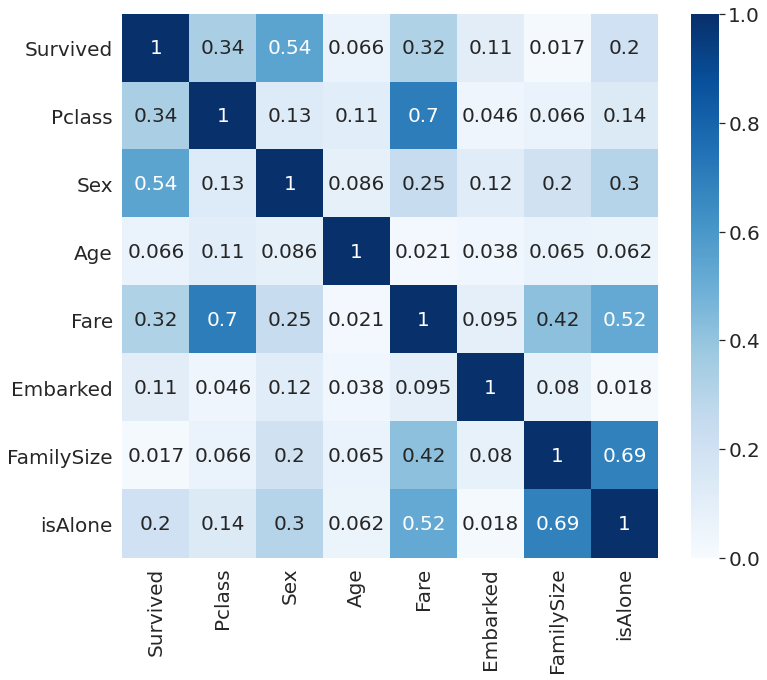

In [31]:
def show_heatmap(df):
    plt.figure(figsize=(12,10))
    cor = np.abs(df.corr())
    sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1)
    plt.show()
    
show_heatmap(train_df)

- We can see that **Fare** and **Pclass** both have high correlation, so we will create a new feature - FarePclass:

In [32]:
train_df['FarePclass'] = train_df['Fare'] * train_df['Pclass']
test_df['FarePclass'] = test_df['Fare'] * test_df['Pclass']

display(train_df.head())
display(test_df.head())

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,FarePclass
0,0,3,0,1,0,0,2,0,0
1,1,1,1,2,4,1,2,0,4
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,4,0,2,0,4
4,0,3,0,2,1,0,1,1,3


,PassengerId,Pclass,Sex,Age,Fare,Embarked,FamilySize,isAlone,FarePclass
0,892,3,0,2,0,2,1,1,0
1,893,3,1,2,0,0,2,0,0
2,894,2,0,3,1,2,1,1,2
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,2,0,3,0,6


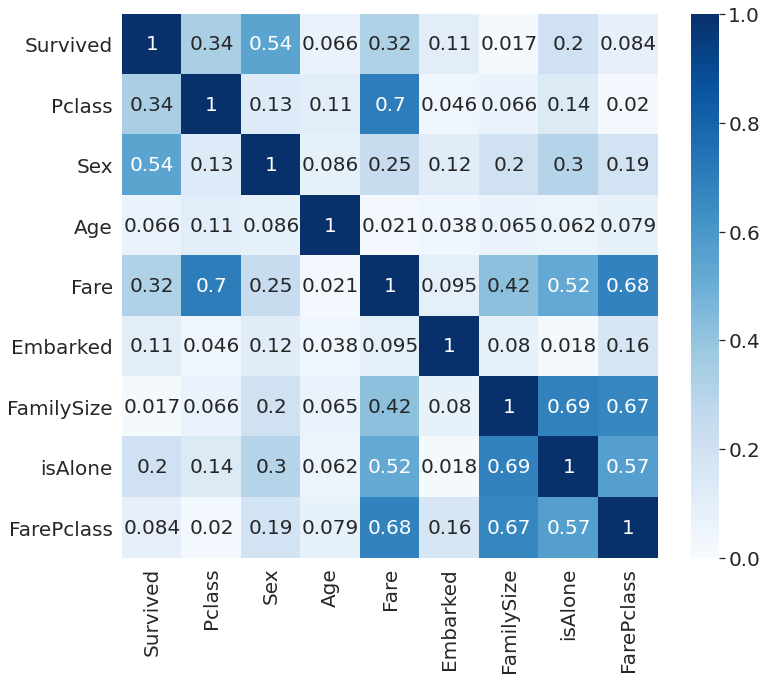

In [33]:
show_heatmap(train_df)

In [34]:
# train_df['FarePclass*familySize'] = train_df['FarePclass'] * train_df['FamilySize']
# test_df['FarePclass*familySize'] = test_df['FarePclass'] * test_df['FamilySize']

# display(train_df.head())
# display(test_df.head())

In [35]:
train_df = train_df.drop(['FamilySize'], axis=1)
test_df = test_df.drop(['FamilySize'], axis=1)

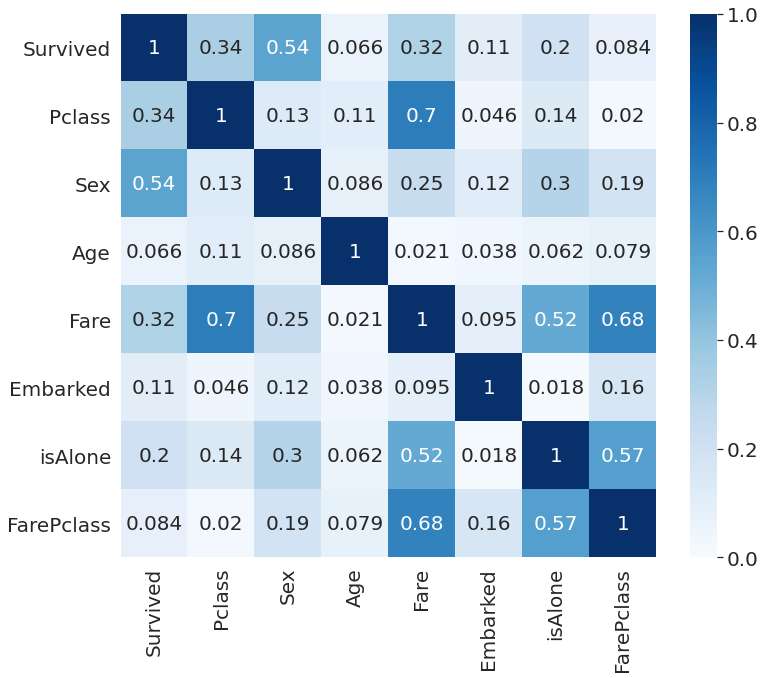

In [36]:
show_heatmap(train_df)

We see a relative correlation between `Age` and `Pclass`, so I will create a new feature:

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,FarePclass,AgePclass
0,0,3,0,1,0,0,0,0,3
1,1,1,1,2,4,1,0,4,2
2,1,3,1,1,1,0,1,3,3
3,1,1,1,2,4,0,0,4,2
4,0,3,0,2,1,0,1,3,6


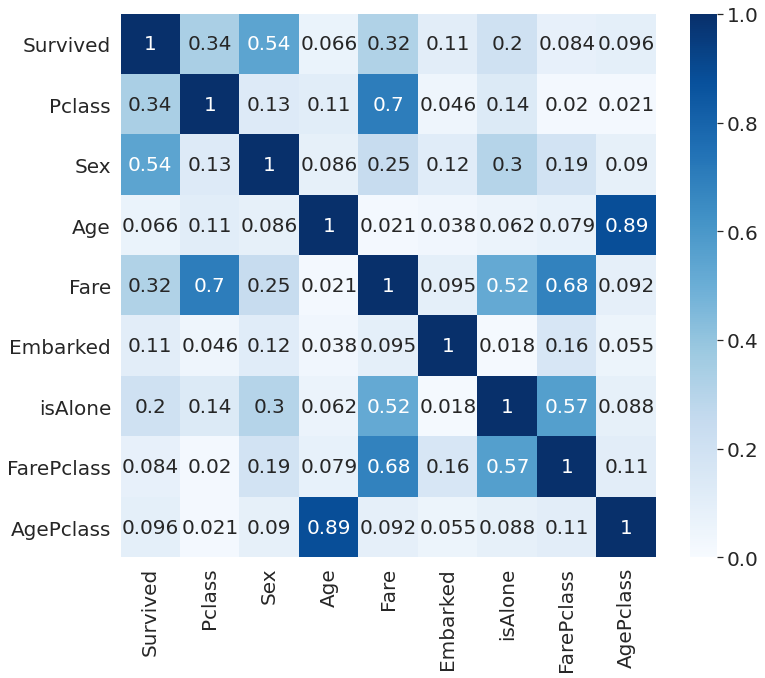

In [37]:
train_df['AgePclass'] = train_df['Age'] * train_df['Pclass']
test_df['AgePclass'] = test_df['Age'] * test_df['Pclass']
# train_df = train_df.drop(['Age'])
display(train_df.head())
show_heatmap(train_df)

,Survived,Pclass,Sex,Age,Fare,Embarked,isAlone,FarePclass,AgePclass,Sex*Embarked
0,0,3,0,1,0,0,0,0,3,0
1,1,1,1,2,4,1,0,4,2,1
2,1,3,1,1,1,0,1,3,3,0
3,1,1,1,2,4,0,0,4,2,0
4,0,3,0,2,1,0,1,3,6,0


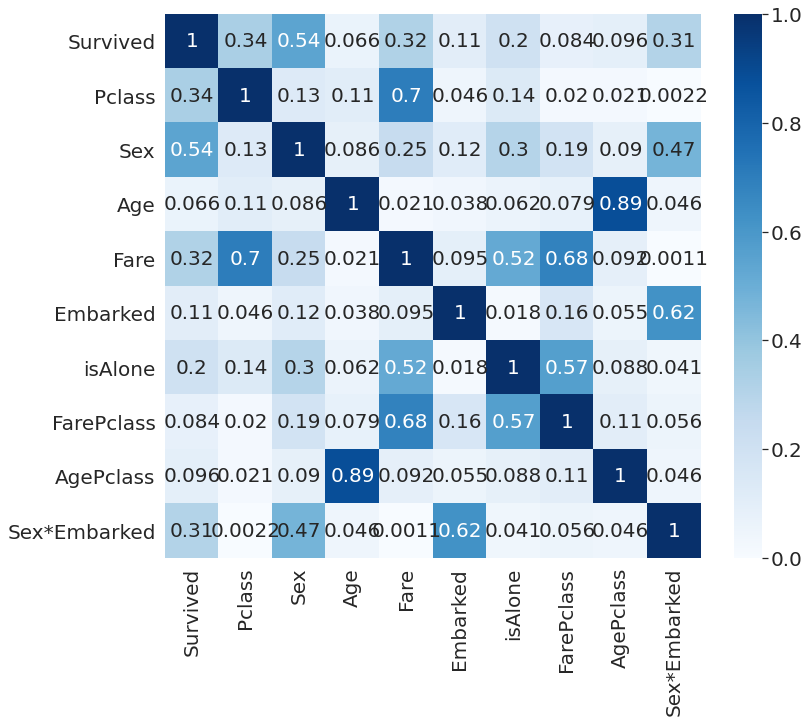

In [38]:
train_df['Sex*Embarked'] = train_df['Sex'] * train_df['Embarked']
test_df['Sex*Embarked'] = test_df['Sex'] * test_df['Embarked']

display(train_df.head())
show_heatmap(train_df)

After all this preparation we are done and ready to create our model for testing our data.

## Classification

I will use 2 models to classify data using logistic regression:
- LogisticRegression
- SGDClassifier

First, I will split train data to 80% train and 20% test which gave me the best score.
Then, produce a score to see if the features adjustments were correct or to take a different approach.

In [39]:
t = train_df['Survived']
X = train_df.drop(['Survived'], axis=1)
X_train, X_test, t_train, t_test = model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

Using LogisticRegression:

In [40]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, t_train)
Y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train, t_train)
logreg_score_test = logreg.score(X_test, t_test)
print("LogisticRegression train accuracy score:", logreg_score_train)
print("LogisticRegression test accuracy score:", logreg_score_test)

LogisticRegression train accuracy score: 0.8061797752808989
LogisticRegression test accuracy score: 0.7541899441340782


Using SGDClassifier:

In [41]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)

In [42]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8160112359550562
Accuracy score on test 0.7932960893854749

CE on train 0.4372152833067154
CE on test 0.568138713830745


Now, after trying both models and getting a better score with SDGClassifier, I will use SGDClassifier as my submission model:

** However, after trying to improve my prediction and it did not work, I will use LogisticRegression:

In [43]:
X_train = X
t_train = t
X_test = test_df.drop(['PassengerId'], axis=1)


# SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
# y_train_prob = SGD_cls.predict_proba(X_train)
# y_test_prob = SGD_cls.predict_proba(X_test)
# y_train = SGD_cls.predict(X_train)
# y_test = SGD_cls.predict(X_test)

logreg = linear_model.LogisticRegression(max_iter=200)
logreg.fit(X_train, t_train)
Y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train, t_train)
print("LogisticRegression train accuracy score:", logreg_score_train)

LogisticRegression train accuracy score: 0.797979797979798


## Generating submission file

In [44]:
# submission = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": y_test
#     })

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)

## Conclusions

My first submission score was 0.74162.  

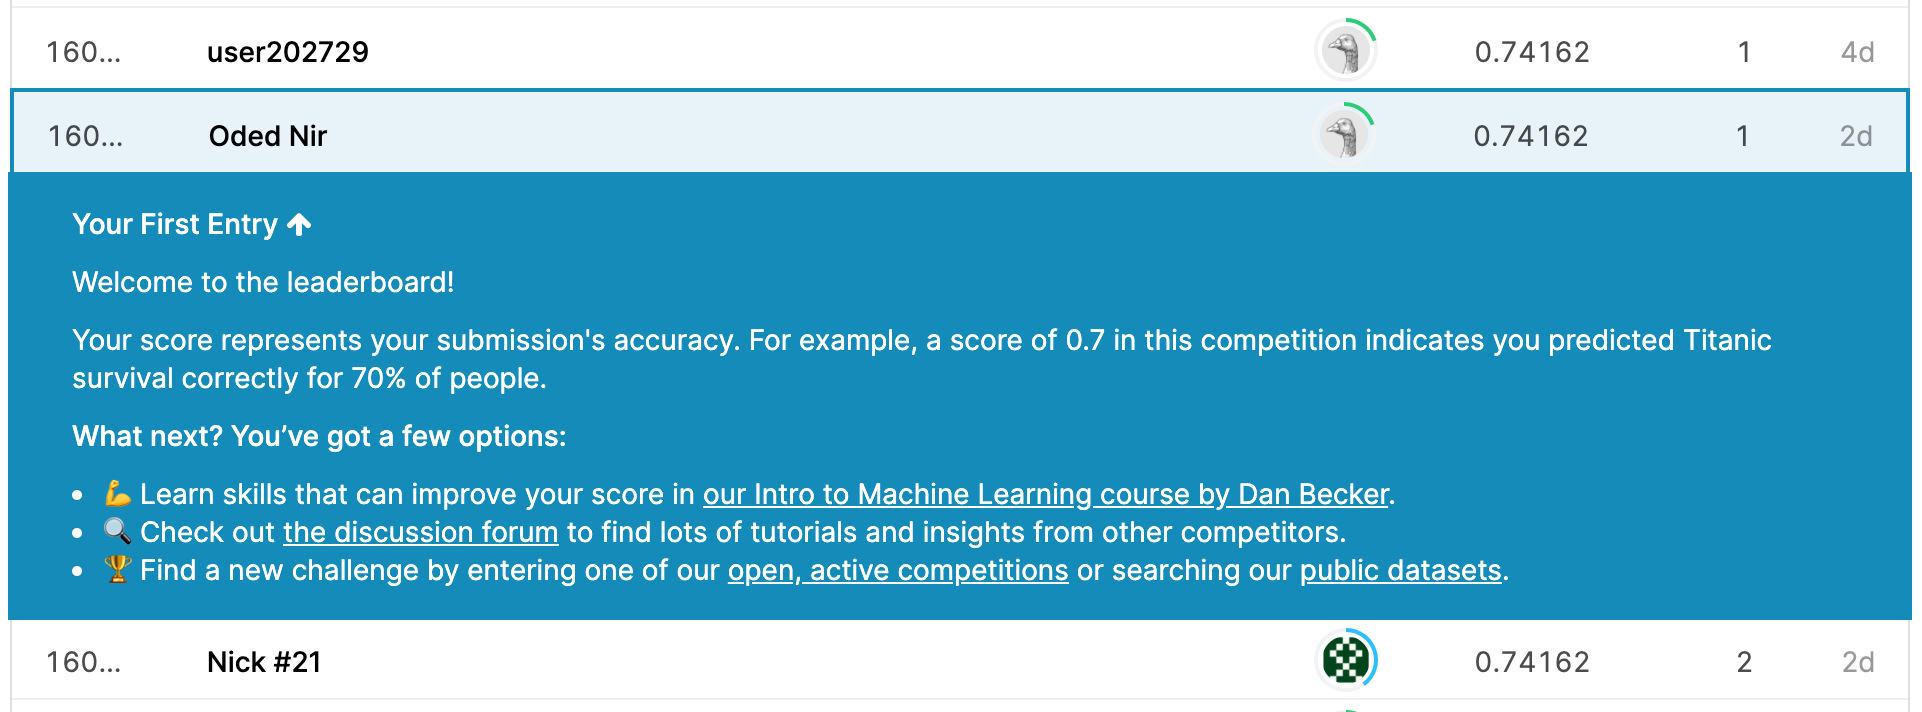

My second submission score was 0.76076.

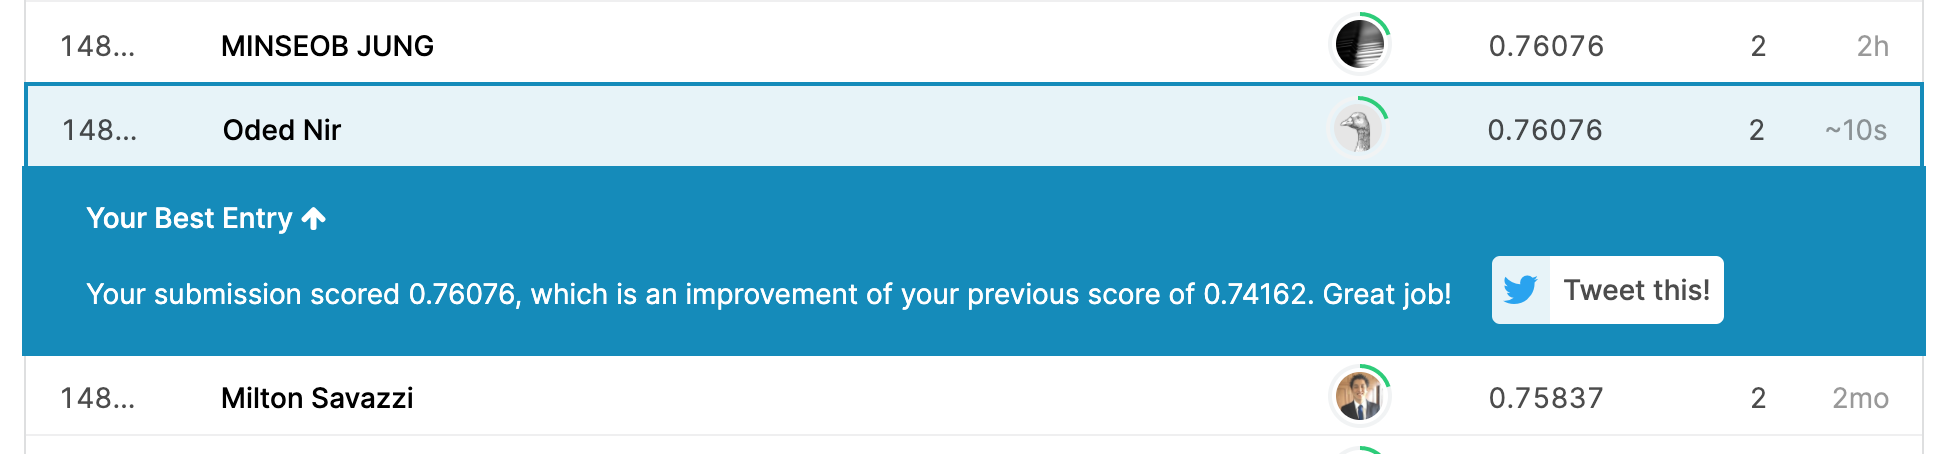

After testing several artifitial features, I decided to create a `Fare*Pclass*Family` feature after noticing a strong correlation between the artifitial feature I created - `FarePclass` and `FamilySize`.  
However, it did not improved my score.

So, I tried using the LogisticRegression, with the `FarePclass*Family` feature I created.
That did improve the model:

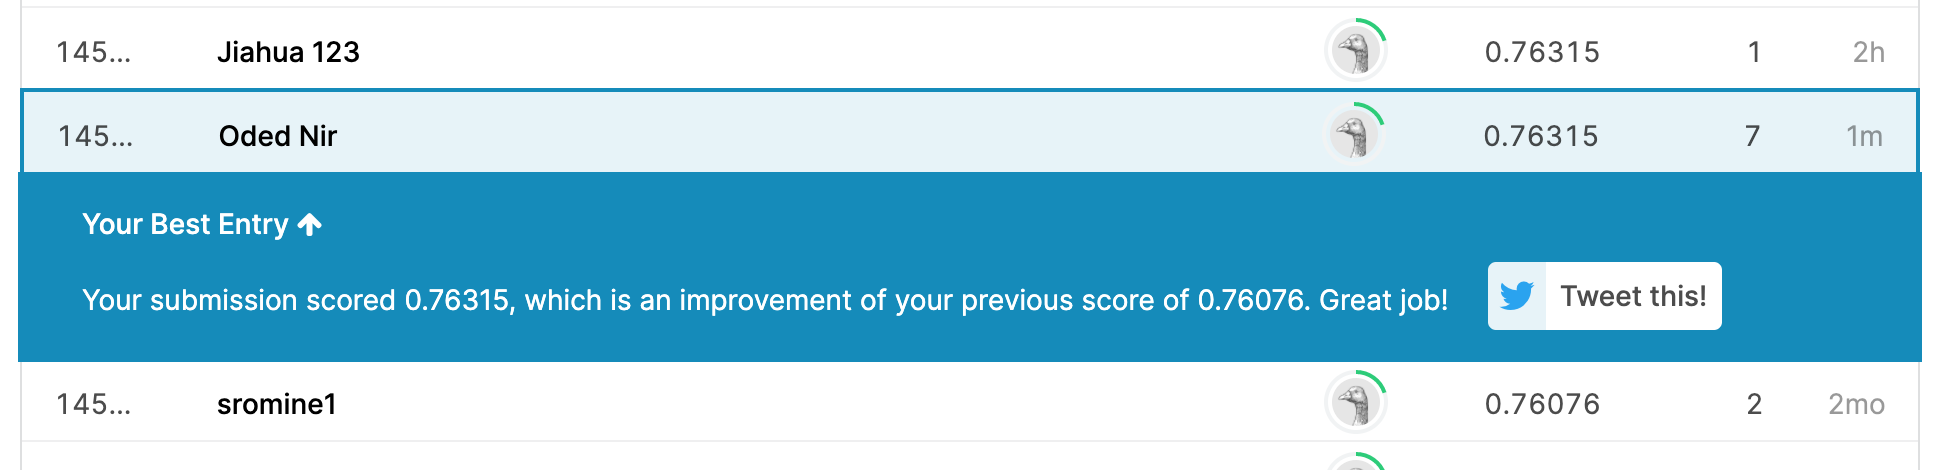

I added an `isAlone` feature, with tells if the passenger is traveling alone or not.
With that it gave me the best score yet - 0.76555:

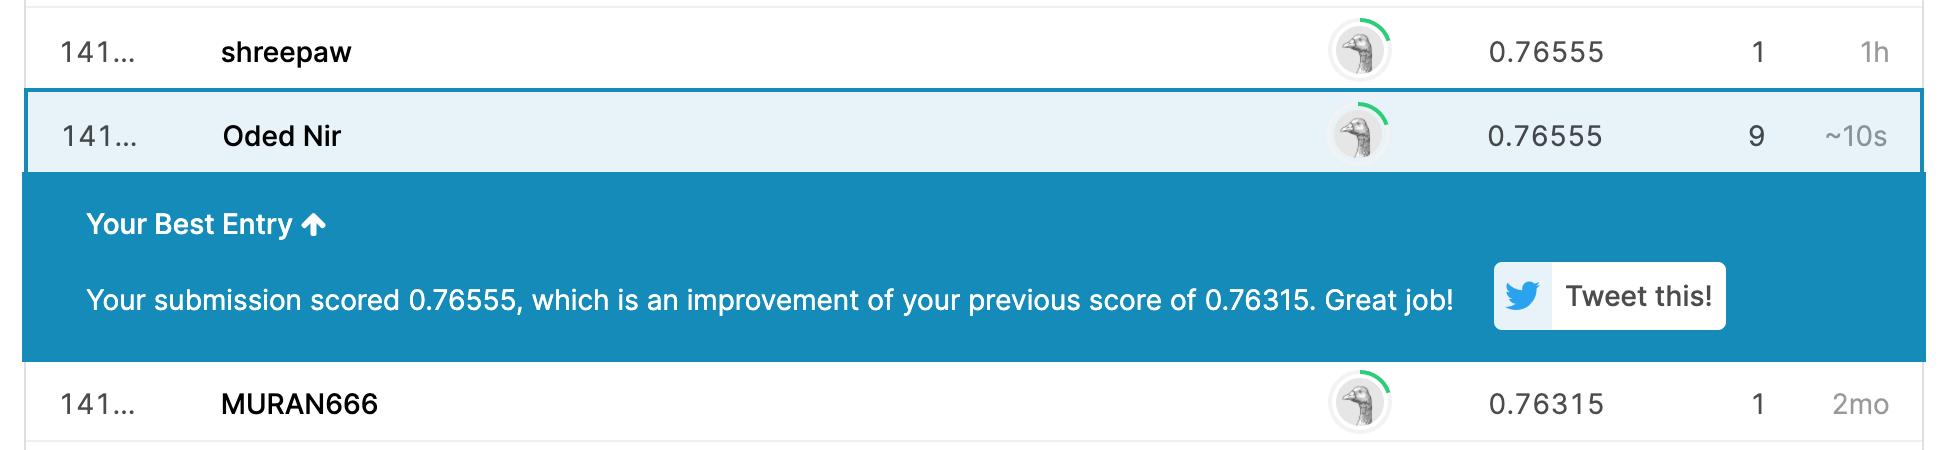

## Notebookes used as inspiration

Titanic Data Science Solutions  
[Manav Sehgal Titanc Competition notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)

Titanic: A complete approach to Top Rankings  
[Pedro de Matos Gonçalves Titanc Competition notebook](https://www.kaggle.com/pedrodematos/titanic-a-complete-approach-to-top-rankings/notebook)

Titanic: logistic regression with python  
[Baligh Mnassri Titanc Competition notebook](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python#4.-Logistic-Regression-and-Results)